In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Trying to replicate Sahai's behavior of solution not being better for y being constant

In [50]:
x = np.zeros((50,1000))

for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        if(j >= 100):
            x[i,j] = np.random.normal(0,1e-4,1)
        else:
            x[i,j] = i
            
y = np.zeros(50)
y += 3
print(y)

y_test = np.zeros(100)
y_test += 3
print(y)

x_test = np.zeros((50,1000))
for i in range(x_test.shape[0]):
    for j in range(x_test.shape[1]):
        if(j >= 1):
            x_test[i,j] = np.random.normal(0,1,1)
        else:
            x_test[i,j] = i + 0.5

print(x_test)
        

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3.]
[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3.]
[[ 5.00000000e+01  8.14724949e-01 -1.69592327e+00 ...  5.42183006e-01
   1.70002043e-01  1.23323759e+00]
 [ 5.10000000e+01 -1.75133829e+00  1.08594406e-01 ...  2.82618893e-01
   6.22871646e-01  1.05995865e+00]
 [ 5.20000000e+01  1.32676487e+00  1.45269713e-01 ... -9.05338865e-01
   3.06965391e-01  3.80038480e-01]
 ...
 [ 9.70000000e+01  1.54713609e-01  5.10694306e-01 ... -1.73408250e+00
   7.80213710e-02 -1.43875121e-01]
 [ 9.80000000e+01  7.56163597e-01 -7.83990487e-01 ...  1.60098187e-01
   7.45251779e-01 -3.83418230e-01]
 [ 9.90000000e+01  8.72862650e-03 -6.78322127e-01 ... -1.73212448e+00
  -8.05193347e-01 -9.23877241e-01]]


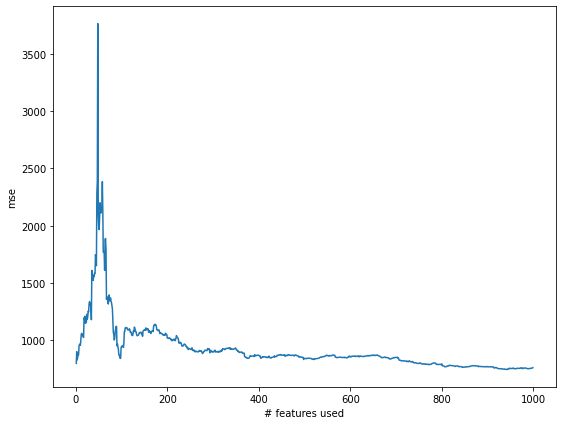

In [62]:
test_accuracy  = np.zeros(x.shape[1]-1)

for i in range(1,x.shape[1]):
    A = x[:,:i]
    A_test = x_test[:,:i]
#     A = np.transpose(A_t)
    Inv = np.linalg.pinv(A)
    beta = np.matmul(Inv,y)
    beta= beta.reshape(beta.size,1)
    pred = np.matmul(A_test,beta)
#     print("This is the mse using " + str(i) + " features such that one of them is signal and the others are all noise :")
    diff = y_test-pred
    sum_sq = np.sum(diff**2)
    mse = sum_sq/(y_test.size)
#     print(mse)
    test_accuracy[i-1] = mse
    
    
plt.figure(figsize = (9,7))
sns.lineplot(x = np.linspace(1,x.shape[1]-1,x.shape[1]-1), y = (test_accuracy))
plt.xlabel("# features used")
plt.ylabel("mse")
plt.show()

In [64]:
# Using the fourier feature instead of the linear ones

[[ 0.+0.j]
 [ 1.+0.j]
 [ 2.+0.j]
 [ 3.+0.j]
 [ 4.+0.j]
 [ 5.+0.j]
 [ 6.+0.j]
 [ 7.+0.j]
 [ 8.+0.j]
 [ 9.+0.j]
 [10.+0.j]
 [11.+0.j]
 [12.+0.j]
 [13.+0.j]
 [14.+0.j]
 [15.+0.j]
 [16.+0.j]
 [17.+0.j]
 [18.+0.j]
 [19.+0.j]
 [20.+0.j]
 [21.+0.j]
 [22.+0.j]
 [23.+0.j]
 [24.+0.j]
 [25.+0.j]
 [26.+0.j]
 [27.+0.j]
 [28.+0.j]
 [29.+0.j]
 [30.+0.j]
 [31.+0.j]
 [32.+0.j]
 [33.+0.j]
 [34.+0.j]
 [35.+0.j]
 [36.+0.j]
 [37.+0.j]
 [38.+0.j]
 [39.+0.j]
 [40.+0.j]
 [41.+0.j]
 [42.+0.j]
 [43.+0.j]
 [44.+0.j]
 [45.+0.j]
 [46.+0.j]
 [47.+0.j]
 [48.+0.j]
 [49.+0.j]]
[[ 1.39354605+0.j -1.39354605+0.j]
 [ 1.43702796+0.j  0.56297204+0.j]
 [ 2.03740385+0.j  1.96259615+0.j]
 [ 2.53012566+0.j  3.46987434+0.j]
 [ 4.16028887+0.j  3.83971113+0.j]
 [ 5.12792799+0.j  4.87207201+0.j]
 [ 7.77788556+0.j  4.22211444+0.j]
 [ 8.80277469+0.j  5.19722531+0.j]
 [ 8.03556073+0.j  7.96443927+0.j]
 [ 9.56943875+0.j  8.43056125+0.j]
 [10.70235735+0.j  9.29764265+0.j]
 [11.3491887 +0.j 10.6508113 +0.j]
 [12.14046037+0.j 11.85953963

<ipython-input-73-f3b808a1f859>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  test_accuracy[i-1] = mse


[[ 1.38369368e+00+0.00000000e+00j  3.88925265e+00+1.18672183e+00j
   2.75110750e+00-9.49609238e-01j -4.22728834e+00-1.35114698e+00j
  -5.82562429e+00-1.32232641e+00j  4.40108551e+00-2.41543202e+00j
   3.82804798e+00-7.61403009e-01j -2.77871684e+00-1.45219358e+00j
  -2.72971103e+00+2.80846123e-01j -2.72971103e+00-2.80846123e-01j
  -2.77871684e+00+1.45219358e+00j  3.82804798e+00+7.61403009e-01j
   4.40108551e+00+2.41543202e+00j -5.82562429e+00+1.32232641e+00j
  -4.22728834e+00+1.35114698e+00j  2.75110750e+00+9.49609238e-01j
   3.88925265e+00-1.18672183e+00j]
 [-8.10827135e-01+0.00000000e+00j -5.12749323e+00+2.32302067e+00j
   4.11163453e+00-1.68606815e+00j  7.00191254e+00-8.19307608e+00j
   9.84683994e-02+2.84353706e-01j -2.12485236e+00+7.58783113e-01j
   2.45577511e+00+1.36076700e+00j  1.18129431e+00-1.00608032e+00j
   1.30867426e+00+7.60168016e-01j  1.30867426e+00-7.60168016e-01j
   1.18129431e+00+1.00608032e+00j  2.45577511e+00-1.36076700e+00j
  -2.12485236e+00-7.58783113e-01j  9.8468

[[  3.3761906 +0.j          -3.61481763+1.36128422j
    0.98088627-0.14640181j ...   3.22134014+0.78109137j
    0.98088627+0.14640181j  -3.61481763-1.36128422j]
 [  4.57493576+0.j          -3.24589796+3.94013311j
   -1.04172803-3.71390773j ... -10.29388068-7.91668658j
   -1.04172803+3.71390773j  -3.24589796-3.94013311j]
 [  2.61574618+0.j          -4.38909144-9.17805297j
    6.57298075-0.04197899j ...  -2.76222094-6.13631318j
    6.57298075+0.04197899j  -4.38909144+9.17805297j]
 ...
 [ 51.39886575+0.j          44.31324281-7.44371969j
   43.87394517-0.18737672j ...  46.65394185+0.34630039j
   43.87394517+0.18737672j  44.31324281+7.44371969j]
 [ 42.93544472+0.j          57.37796551-1.51657446j
   45.00774015+3.04325341j ...  39.36115824+3.87101369j
   45.00774015-3.04325341j  57.37796551+1.51657446j]
 [ 38.85944996+0.j          49.11382948+1.98505417j
   47.00421984+4.26935854j ...  50.75005063-8.910875j
   47.00421984-4.26935854j  49.11382948-1.98505417j]]
[[  3.68946804+0.j          -3

[[ 6.34109707+0.j          3.11735681-2.51642053j  4.03243717+9.07643525j
  ... -0.51556967-3.57702353j  4.03243717-9.07643525j
   3.11735681+2.51642053j]
 [ 6.65435801+0.j         -1.23928062-2.61155336j  6.69784804+4.65774216j
  ...  1.36525227+2.2290724j   6.69784804-4.65774216j
  -1.23928062+2.61155336j]
 [ 9.03578422+0.j         11.15790266-5.20512984j -5.08165003+4.22782034j
  ... 10.02025372-1.69254329j -5.08165003-4.22782034j
  11.15790266+5.20512984j]
 ...
 [53.68821264+0.j         51.23320547-5.59560164j 40.83361316-3.95726706j
  ... 47.0192385 +4.13038123j 40.83361316+3.95726706j
  51.23320547+5.59560164j]
 [45.23614829+0.j         54.97406874+9.16971704j 47.33041179-3.35201211j
  ... 36.22914392-2.5653077j  47.33041179+3.35201211j
  54.97406874-9.16971704j]
 [33.66929487+0.j         43.54331588+1.78703262j 47.83469788-5.39077552j
  ... 53.11595203-3.68171918j 47.83469788+5.39077552j
  43.54331588-1.78703262j]]
[[ 7.24383754+0.j          4.05219965-2.14268184j  3.84345681+9.

[[ -0.95241533 +0.j          -3.55442556 -5.04972624j
   -4.65654748 -8.1602347j  ...  12.06967183 -5.56378167j
   -4.65654748 +8.1602347j   -3.55442556 +5.04972624j]
 [  3.73450794 +0.j          -5.23864312 -1.95978741j
  -10.53337868 -0.07220668j ...   5.07491109 +2.77861618j
  -10.53337868 +0.07220668j  -5.23864312 +1.95978741j]
 [  8.12990013 +0.j           6.05496323 +0.7490947j
   -3.32176253-13.16357265j ...  -1.81495669 -5.38377903j
   -3.32176253+13.16357265j   6.05496323 -0.7490947j ]
 ...
 [ 42.6079649  +0.j          47.49775307-12.44425705j
   50.67552245-12.85976252j ...  42.04375588 +0.89041969j
   50.67552245+12.85976252j  47.49775307+12.44425705j]
 [ 39.69105664 +0.j          43.99082059 +4.42089599j
   60.51221027 -7.32235091j ...  49.67856538 +1.19731212j
   60.51221027 +7.32235091j  43.99082059 -4.42089599j]
 [ 35.47959244 +0.j          51.43154038 +2.28623057j
   53.2449648 +11.44193664j ...  42.48565197 -2.37928338j
   53.2449648 -11.44193664j  51.43154038 -2.28623

[[ -4.71518801 +0.j          -1.76112796 -8.00276436j
    1.09534438 -1.79090607j ... -14.39840264 -5.29734971j
    1.09534438 +1.79090607j  -1.76112796 +8.00276436j]
 [  6.92835518 +0.j          -1.60041416 -3.08083115j
   -1.92654433 -1.24636636j ...  -4.33987844-12.25064331j
   -1.92654433 +1.24636636j  -1.60041416 +3.08083115j]
 [  5.54436205 +0.j           1.96792601 -1.26945717j
    7.47996284-10.99557669j ... -12.29307062 +2.78791658j
    7.47996284+10.99557669j   1.96792601 +1.26945717j]
 ...
 [ 46.19862587 +0.j          59.73875974 -9.30135703j
   52.82609941 +3.15673255j ...  36.07295344 +7.00013007j
   52.82609941 -3.15673255j  59.73875974 +9.30135703j]
 [ 35.4247939  +0.j          41.1748389  +1.12938359j
   54.54975912 +5.42323657j ...  43.9041074 +15.45797197j
   54.54975912 -5.42323657j  41.1748389  -1.12938359j]
 [ 38.4735626  +0.j          52.39910228+10.08633891j
   40.42520297+10.40732003j ...  52.72164589 -0.65197212j
   40.42520297-10.40732003j  52.39910228-10.0863

[[-3.32057999 +0.j          6.12976049 -8.87375037j
   3.55310552 +1.3734604j  ...  0.74514278 +3.98807432j
   3.55310552 -1.3734604j   6.12976049 +8.87375037j]
 [10.41684032 +0.j          2.29578045 -3.73157597j
   0.90663269 -0.92922388j ... -3.42818626 +1.21336786j
   0.90663269 +0.92922388j  2.29578045 +3.73157597j]
 [ 3.17374954 +0.j          2.72797056 -6.67210393j
  14.57015625 -6.58685083j ...  2.60788125+12.51752012j
  14.57015625 +6.58685083j  2.72797056 +6.67210393j]
 ...
 [41.01877311 +0.j         58.95065713 -7.2928406j
  44.09331629 -7.01128555j ... 59.50897291+15.7053664j
  44.09331629 +7.01128555j 58.95065713 +7.2928406j ]
 [36.59321918 +0.j         45.94003281 -0.38969865j
  52.51210356 +9.7267965j  ... 62.13680291 +2.47159205j
  52.51210356 -9.7267965j  45.94003281 +0.38969865j]
 [39.16844223 +0.j         46.40404463+14.08101635j
  39.57407888 -1.37946398j ... 53.72435767 -8.1594541j
  39.57407888 +1.37946398j 46.40404463-14.08101635j]]
[[-4.49313827 +0.j          5.1

[[-6.70490432e+00 +0.j          7.19305059e+00 -4.93874144j
  -6.18889113e+00 +1.89273108j ... -3.34920573e+00 +2.65311699j
  -6.18889113e+00 -1.89273108j  7.19305059e+00 +4.93874144j]
 [ 5.68807355e+00 +0.j         -3.13039486e+00 -3.86838097j
  -7.35590144e+00 -3.90442967j ... -5.82214397e+00 +7.91355199j
  -7.35590144e+00 +3.90442967j -3.13039486e+00 +3.86838097j]
 [ 4.58845235e-02 +0.j          5.39510316e+00 -7.92271351j
   9.18591633e+00 +4.22858837j ...  2.71043211e+00 +9.63437126j
   9.18591633e+00 -4.22858837j  5.39510316e+00 +7.92271351j]
 ...
 [ 4.50071418e+01 +0.j          6.53869628e+01 -0.77157866j
   5.18969111e+01 -6.10100433j ...  5.04917560e+01 -7.36645116j
   5.18969111e+01 +6.10100433j  6.53869628e+01 +0.77157866j]
 [ 2.73143637e+01 +0.j          4.01596254e+01 -1.73297628j
   3.86518063e+01 +5.08710536j ...  5.21005361e+01 +0.11986615j
   3.86518063e+01 -5.08710536j  4.01596254e+01 +1.73297628j]
 [ 3.85137743e+01 +0.j          3.74911862e+01+15.76688796j
   4.41725

[[-6.24960277 +0.j          9.32444853 -4.50305451j
  -4.55640486 -6.27005273j ...  6.40786007 +6.70309376j
  -4.55640486 +6.27005273j  9.32444853 +4.50305451j]
 [ 4.04690668 +0.j         -3.4715723  -7.39974599j
  -2.57765407 -9.95636392j ...  5.29568905 +6.27961787j
  -2.57765407 +9.95636392j -3.4715723  +7.39974599j]
 [ 5.94413118 +0.j         13.91894597 -5.98323704j
   8.98932117 +7.05388641j ... 12.30361388 +8.39577912j
   8.98932117 -7.05388641j 13.91894597 +5.98323704j]
 ...
 [48.80189137 +0.j         67.7342099  +5.04934612j
  52.60487408 -3.75383001j ... 42.30070131 -1.23815377j
  52.60487408 +3.75383001j 67.7342099  -5.04934612j]
 [26.71062495 +0.j         43.45393487 -4.84395546j
  44.74658179 -1.17247969j ... 61.95154486 -4.64375573j
  44.74658179 +1.17247969j 43.45393487 +4.84395546j]
 [36.3317166  +0.j         32.02386563+11.58132396j
  48.13615984 -4.69214115j ... 38.69498825 +3.20974348j
  48.13615984 +4.69214115j 32.02386563-11.58132396j]]
[[-5.44369921-8.88178420e-16

[[6.81044588e-03 +0.j         1.64583032e+01 +0.88683072j
  4.17503113e+00 -2.71316271j ... 6.01100599e+00-11.84415595j
  4.17503113e+00 +2.71316271j 1.64583032e+01 -0.88683072j]
 [9.63199694e+00 +0.j         5.33886554e+00 -8.17672811j
  1.00450746e+01 -3.00341669j ... 4.80151865e+00-11.13016422j
  1.00450746e+01 +3.00341669j 5.33886554e+00 +8.17672811j]
 [1.09545945e+01 +0.j         1.84840517e+01 +1.85563622j
  9.51804334e-01+11.4818345j  ... 9.30404011e+00 -2.09716995j
  9.51804334e-01-11.4818345j  1.84840517e+01 -1.85563622j]
 ...
 [4.54130978e+01 +0.j         6.08347607e+01 +7.5447081j
  4.91160468e+01-11.9643508j  ... 4.72359049e+01+15.51294953j
  4.91160468e+01+11.9643508j  6.08347607e+01 -7.5447081j ]
 [2.00320731e+01 +0.j         4.32896659e+01 -8.35222701j
  4.77494282e+01 -2.17931273j ... 5.20708149e+01-12.7223845j
  4.77494282e+01 +2.17931273j 4.32896659e+01 +8.35222701j]
 [5.07640121e+01 +0.j         4.39293661e+01+13.02257535j
  6.44741919e+01+11.9180671j  ... 4.80903349

[[ -3.51738234 +0.j          11.13943506 +4.51601246j
   -1.85236352 -5.29653119j ...  -9.784018   +1.06712811j
   -1.85236352 +5.29653119j  11.13943506 -4.51601246j]
 [ 11.48453876 +0.j           7.78166181 -3.09660373j
    1.62705152 +9.22207518j ... -17.84637888 -4.83414037j
    1.62705152 -9.22207518j   7.78166181 +3.09660373j]
 [ 12.17708608 +0.j          14.72499637 +8.45406313j
  -10.01094063 +2.54819224j ...   6.16819171 +3.31511091j
  -10.01094063 -2.54819224j  14.72499637 -8.45406313j]
 ...
 [ 45.6984741  +0.j          57.22130593+11.49151138j
   54.65027099 -9.80396289j ...  50.66475931 +1.40316843j
   54.65027099 +9.80396289j  57.22130593-11.49151138j]
 [ 12.32099059 +0.j          44.76214266-13.19083754j
   50.22336243 -3.03903593j ...  46.28277306 -5.38952787j
   50.22336243 +3.03903593j  44.76214266+13.19083754j]
 [ 51.81412164 +0.j          39.35885693+16.01120554j
   48.66485856+21.75008842j ...  32.38164624 +2.68640361j
   48.66485856-21.75008842j  39.35885693-16.0112

[[-14.2089964  +0.j          -0.60317625 +2.35454346j
   -8.21223355-15.84792418j ...  -8.58684709+17.01627928j
   -8.21223355+15.84792418j  -0.60317625 -2.35454346j]
 [ 14.96717828 +0.j          10.1442178  -1.55123808j
   -3.44627833 +4.71900157j ...  -7.74831129+15.40954452j
   -3.44627833 -4.71900157j  10.1442178  +1.55123808j]
 [ 11.86051794 +0.j           9.58898247+10.97093736j
  -10.80154438 -7.65291215j ...  10.10129319 +1.28919319j
  -10.80154438 +7.65291215j   9.58898247-10.97093736j]
 ...
 [ 47.70600495 +0.j          55.73292897+13.10235807j
   58.12034477 -7.86448171j ...  45.2314077  +2.83044598j
   58.12034477 +7.86448171j  55.73292897-13.10235807j]
 [ 10.19181365 +0.j          49.97406218-12.85859228j
   51.70986872 +3.49816472j ...  43.69530454 -8.20613956j
   51.70986872 -3.49816472j  49.97406218+12.85859228j]
 [ 52.91279387 +0.j          35.63900318+16.01756875j
   39.97231611+17.27962723j ...  47.26824936+14.86303554j
   39.97231611-17.27962723j  35.63900318-16.0175

[[-16.16388893 +0.j          -1.39335167 -0.97754114j
    2.53466275-21.40039189j ...   8.15910694+12.7475815j
    2.53466275+21.40039189j  -1.39335167 +0.97754114j]
 [ 19.56779187 +0.j          12.66993286 +2.16607951j
   -4.02730823 +2.79675724j ...   7.60975574+10.52366174j
   -4.02730823 -2.79675724j  12.66993286 -2.16607951j]
 [ 12.88584857 +0.j           6.52948052+10.28851982j
   -3.08752765-17.04263446j ...  13.37240126 -3.01656684j
   -3.08752765+17.04263446j   6.52948052-10.28851982j]
 ...
 [ 55.44011059 +0.j          59.90224305+15.38714036j
   65.87043033 -3.22635597j ...  50.07301763 +4.53522264j
   65.87043033 +3.22635597j  59.90224305-15.38714036j]
 [  7.83784884 +0.j          54.43303376-13.33243709j
   50.16982945 +4.09094788j ...  43.60537652 -0.07297391j
   50.16982945 -4.09094788j  54.43303376+13.33243709j]
 [ 57.34343919 +0.j          35.32908806+16.89931448j
   39.25890049+14.82502558j ...  62.4736027  +3.25158467j
   39.25890049-14.82502558j  35.32908806-16.89931

[[-15.0183362  +0.j           1.77149726 -2.42839667j
   14.15329699-17.30915158j ...  10.76247137 -1.91111264j
   14.15329699+17.30915158j   1.77149726 +2.42839667j]
 [ 17.76677786 +0.j           7.90898116 +5.41499216j
  -10.00547346 +0.6641861j  ...   4.72989063 +1.76852329j
  -10.00547346 -0.6641861j    7.90898116 -5.41499216j]
 [ 14.12803728 +0.j           4.65180831+10.7392073j
    5.33691691-16.67761305j ...   8.20820435-13.17067972j
    5.33691691+16.67761305j   4.65180831-10.7392073j ]
 ...
 [ 58.09421465 +0.j          58.78487771+17.77287633j
   65.75292757 +1.47377645j ...  49.48496988 +5.81346973j
   65.75292757 -1.47377645j  58.78487771-17.77287633j]
 [  8.59733276 +0.j          60.46758342-10.2672197j
   49.63708907 +8.32895759j ...  47.0787674  -2.19438565j
   49.63708907 -8.32895759j  60.46758342+10.2672197j ]
 [ 58.18892512 +0.j          32.0011648 +16.23377903j
   37.60292763+11.18087271j ...  62.42490615 -6.86517912j
   37.60292763-11.18087271j  32.0011648 -16.233779

[[-10.12567753+1.77635684e-15j   8.62222758-2.60510285e+00j
   24.18627825-9.76406510e+00j ...   6.52835504-9.35163407e+00j
   24.18627825+9.76406510e+00j   8.62222758+2.60510285e+00j]
 [ 16.26183588-2.66453526e-15j   3.49121613+6.11922604e+00j
  -13.11642678-5.17712239e+00j ...   0.75004633+1.85068218e+00j
  -13.11642678+5.17712239e+00j   3.49121613-6.11922604e+00j]
 [ 19.2739278 -8.88178420e-16j   7.31658236+1.03305694e+01j
   15.32434167-1.46044851e+01j ...   3.20454206-1.44805880e+01j
   15.32434167+1.46044851e+01j   7.31658236-1.03305694e+01j]
 ...
 [ 63.58102712-2.13162821e-14j  60.26837567+2.11703320e+01j
   66.4984296 +7.25630156e+00j ...  51.10613953+4.45683898e+00j
   66.4984296 -7.25630156e+00j  60.26837567-2.11703320e+01j]
 [  8.03783008-6.21724894e-15j  63.46951467-7.07606526e+00j
   45.8232332 +9.80749958e+00j ...  46.17441254-2.25031556e+00j
   45.8232332 -9.80749958e+00j  63.46951467+7.07606526e+00j]
 [ 61.33689116+7.10542736e-15j  31.53306771+1.67365250e+01j
   39.1659

[[-11.30119232 +0.j           9.19455984 -0.8849909j
   22.38692432 +1.35161597j ...  -9.36832721 -8.11743424j
   22.38692432 -1.35161597j   9.19455984 +0.8849909j ]
 [  8.12204949 +0.j          -7.33572033 +3.52817884j
  -17.53398848-16.21367511j ...  -3.21909588 +8.05735336j
  -17.53398848+16.21367511j  -7.33572033 -3.52817884j]
 [ 24.87962455 +0.j          10.07318771+11.0040284j
   23.36780987 -7.90663922j ...  -3.29428713-12.00129508j
   23.36780987 +7.90663922j  10.07318771-11.0040284j ]
 ...
 [ 68.73664536 +0.j          59.75035513+24.82521278j
   63.89625762+11.40948497j ...  51.80295848 +6.30963638j
   63.89625762-11.40948497j  59.75035513-24.82521278j]
 [  5.6331999  +0.j          64.17777625 -3.14042613j
   39.60278078 +8.38006521j ...  45.1544155  -0.04754525j
   39.60278078 -8.38006521j  64.17777625 +3.14042613j]
 [ 66.04547906 +0.j          31.98004096+16.24926969j
   41.66549535+11.30083084j ...  52.7341109 -21.0178781j
   41.66549535-11.30083084j  31.98004096-16.2492696

[[ -2.24673833-2.22044605e-15j  18.92176739+2.19197412e+00j
   26.57499066+1.04197962e+01j ...  -8.57145336-2.34994462e+00j
   26.57499066-1.04197962e+01j  18.92176739-2.19197412e+00j]
 [  6.2931335 +1.42108547e-14j -10.14077431+1.89273299e-01j
  -11.5098632 -2.34833935e+01j ...   2.89967604+8.41765595e+00j
  -11.5098632 +2.34833935e+01j -10.14077431-1.89273299e-01j]
 [ 23.88193152+5.32907052e-15j   6.64870689+1.13132878e+01j
   21.46968193-3.02406887e+00j ... -11.52763   -4.45861728e+00j
   21.46968193+3.02406887e+00j   6.64870689-1.13132878e+01j]
 ...
 [ 66.00141719-1.42108547e-14j  51.84750356+2.67139990e+01j
   54.58759055+1.12481030e+01j ...  47.74867148+1.09199814e+01j
   54.58759055-1.12481030e+01j  51.84750356-2.67139990e+01j]
 [  2.58509033-1.42108547e-14j  62.95049322-3.88169300e-01j
   34.79375435+4.64926302e+00j ...  45.65604221+2.20824183e+00j
   34.79375435-4.64926302e+00j  62.95049322+3.88169300e-01j]
 [ 63.29486988+2.13162821e-14j  25.83434153+1.55411983e+01j
   36.8162

[[ -4.66757362 +0.j          16.09073655 +6.23332948j
   15.83561609+17.59852216j ... -15.98618348 +4.9750627j
   15.83561609-17.59852216j  16.09073655 -6.23332948j]
 [ 11.01599239 +0.j          -5.42112237 -2.62807534j
    2.75558764-25.47997542j ...  12.67023034 +1.17731983j
    2.75558764+25.47997542j  -5.42112237 +2.62807534j]
 [ 21.40053925 +0.j           1.59401971+12.36786558j
   16.06083997 +2.41133277j ... -17.70906206 +2.45352391j
   16.06083997 -2.41133277j   1.59401971-12.36786558j]
 ...
 [ 64.24219187 +0.j          45.04171183+26.90389855j
   48.45618613 +7.45650843j ...  49.81641948+16.94144096j
   48.45618613 -7.45650843j  45.04171183-26.90389855j]
 [ -4.53633102 +0.j          57.2670089  +0.97661532j
   28.01964166 -2.04994305j ...  43.93225423 +5.62968322j
   28.01964166 +2.04994305j  57.2670089  -0.97661532j]
 [ 68.67625891 +0.j          28.07081794+14.97330623j
   40.38432877+11.30732905j ...  42.20577986-17.72034893j
   40.38432877-11.30732905j  28.07081794-14.97330

[[  6.54280838 +0.j          26.49588964 +9.25777839j
   20.58719919+20.84997337j ...  -5.21620275 +9.96873676j
   20.58719919-20.84997337j  26.49588964 -9.25777839j]
 [ 13.35585899 +0.j          -2.82122254 -3.53111409j
   10.73337946-22.89150112j ...  13.56841147 -7.22079443j
   10.73337946+22.89150112j  -2.82122254 +3.53111409j]
 [ 17.55762181 +0.j          -3.92370165+11.14007232j
   10.15265775 +1.54934032j ... -20.51382203+12.77641762j
   10.15265775 -1.54934032j  -3.92370165-11.14007232j]
 ...
 [ 68.18233703 +0.j          45.85569698+26.01621157j
   51.43856568 +3.41698595j ...  59.44551388+20.13336861j
   51.43856568 -3.41698595j  45.85569698-26.01621157j]
 [ -4.25202468 +0.j          58.63869665 +1.26499048j
   30.66348013 -7.33951665j ...  50.06752152 +7.09603446j
   30.66348013 +7.33951665j  58.63869665 -1.26499048j]
 [ 67.26699992 +0.j          24.59369636+14.3910189j
   37.64169965+11.35018612j ...  38.1690003 -15.93942114j
   37.64169965-11.35018612j  24.59369636-14.39101

[[ 14.32815404+1.77635684e-15j  32.73539963+1.40827729e+01j
   20.38474882+2.57118940e+01j ...   2.35030332+1.02294350e+01j
   20.38474882-2.57118940e+01j  32.73539963-1.40827729e+01j]
 [ 10.31798452-1.77635684e-15j  -5.51756363-4.47897973e+00j
   12.0790939 -1.91320279e+01j ...   4.48063302-1.36497516e+01j
   12.0790939 +1.91320279e+01j  -5.51756363+4.47897973e+00j]
 [ 14.31819967-1.77635684e-15j  -8.61788735+9.40500218e+00j
    5.9078349 -4.11257297e-01j ... -17.86076919+2.26211837e+01j
    5.9078349 +4.11257297e-01j  -8.61788735-9.40500218e+00j]
 ...
 [ 67.34842294-3.55271368e-15j  41.93354467+2.53220779e+01j
   50.93202635+6.28754436e-01j ...  65.09145018+1.85581371e+01j
   50.93202635-6.28754436e-01j  41.93354467-2.53220779e+01j]
 [ -2.99773532-7.10542736e-15j  61.10604017+1.87128765e+00j
   35.69733768-1.14365281e+01j ...  57.30883139+4.85353870e+00j
   35.69733768+1.14365281e+01j  61.10604017-1.87128765e+00j]
 [ 69.41821889+1.42108547e-14j  24.71040872+1.30939778e+01j
   38.7351

[[ 14.03319458 +0.j          29.33695005+20.2530618j
    8.4600252 +29.26057024j ...   0.63004943+10.51395448j
    8.4600252 -29.26057024j  29.33695005-20.2530618j ]
 [ 12.76366568 +0.j          -2.47015919 -5.72612189j
   18.08712937-13.94913998j ...  -3.22967212-15.74455672j
   18.08712937+13.94913998j  -2.47015919 +5.72612189j]
 [  6.3154287  +0.j         -17.72706627 +5.20765659j
   -0.70373964 -6.38008265j ... -11.95997342+34.59563978j
   -0.70373964 +6.38008265j -17.72706627 -5.20765659j]
 ...
 [ 74.64640725 +0.j          45.61138575+24.76685059j
   59.75987316 -0.49519274j ...  78.07677623+10.65185417j
   59.75987316 +0.49519274j  45.61138575-24.76685059j]
 [ -3.71669824 +0.j          61.87914214 +3.1090556j
   40.4911498 -14.14308671j ...  60.81455911 -2.14437434j
   40.4911498 +14.14308671j  61.87914214 -3.1090556j ]
 [ 65.53851877 +0.j          18.52476662+11.13379026j
   34.08055544 +8.61180488j ...  35.28118676 -8.69584741j
   34.08055544 -8.61180488j  18.52476662-11.133790

[[ 20.02261161+1.77635684e-15j  32.67349417+2.43086075e+01j
    6.56286804+3.00568508e+01j ...   5.72641423+1.07596351e+01j
    6.56286804-3.00568508e+01j  32.67349417-2.43086075e+01j]
 [ 16.56138808-3.10862447e-15j   1.7309167 -5.66272908e+00j
   22.82369328-8.88207420e+00j ...  -6.45155281-1.61145043e+01j
   22.82369328+8.88207420e+00j   1.7309167 +5.66272908e+00j]
 [  5.1885411 -1.77635684e-15j -19.03156343+2.18152672e+00j
    0.86877921-1.00154890e+01j ...  -1.40315909+3.81165635e+01j
    0.86877921+1.00154890e+01j -19.03156343-2.18152672e+00j]
 ...
 [ 71.7107951 +3.55271368e-15j  40.3364236 +2.47346970e+01j
   57.63099141+4.18305251e-01j ...  75.38520837+3.07920569e+00j
   57.63099141-4.18305251e-01j  40.3364236 -2.47346970e+01j]
 [ -6.75791679+4.44089210e-15j  59.77521604+3.92993562e+00j
   41.14304569-1.50461375e+01j ...  58.04992356-7.06715536e+00j
   41.14304569+1.50461375e+01j  59.77521604-3.92993562e+00j]
 [ 65.0984989 +8.88178420e-16j  16.8244057 +9.34526472e+00j
   33.7592

[[ 21.06545476+8.88178420e-16j  28.98237155+2.97743746e+01j
   -3.71066762+2.83572137e+01j ...   5.98717009+1.21812642e+01j
   -3.71066762-2.83572137e+01j  28.98237155-2.97743746e+01j]
 [ 18.16157485+2.22044605e-15j   3.77797392-5.51928950e+00j
   23.57811257-2.10173973e+00j ... -14.56383216-1.18760404e+01j
   23.57811257+2.10173973e+00j   3.77797392+5.51928950e+00j]
 [  4.79870673-7.10542736e-15j -18.89785075-2.58261029e+00j
    6.43829993-1.42571982e+01j ...  15.48299255+3.68448698e+01j
    6.43829993+1.42571982e+01j -18.89785075+2.58261029e+00j]
 ...
 [ 71.8275581 +3.55271368e-15j  37.13684278+2.37178460e+01j
   58.67439696+9.10558495e-01j ...  72.07151256-4.52079619e+00j
   58.67439696-9.10558495e-01j  37.13684278-2.37178460e+01j]
 [ -9.21223741-1.86517468e-14j  58.75053032+4.40909332e+00j
   44.34312063-1.67687851e+01j ...  53.91441511-1.10193434e+01j
   44.34312063+1.67687851e+01j  58.75053032-4.40909332e+00j]
 [ 67.78093886-1.42108547e-14j  18.06103817+6.62832527e+00j
   37.5252

[[ 22.9164276  +0.j          25.20930407+34.42029338j
  -11.72562599+23.09432605j ...   9.43978342+14.46420153j
  -11.72562599-23.09432605j  25.20930407-34.42029338j]
 [ 16.11752621 +0.j           2.01715284 -5.2065103j
   18.57477058 +3.69339208j ... -23.37747668 -3.34964761j
   18.57477058 -3.69339208j   2.01715284 +5.2065103j ]
 [ 10.7045127  +0.j         -11.62740022 -6.50009491j
   19.56033669-14.29118861j ...  34.65753507+25.75966031j
   19.56033669+14.29118861j -11.62740022 +6.50009491j]
 ...
 [ 81.45088745 +0.j          43.58290452+22.87660862j
   69.03728614 +2.95197187j ...  75.77817978-10.8497733j
   69.03728614 -2.95197187j  43.58290452-22.87660862j]
 [ -5.65317149 +0.j          63.72536833 +6.16770154j
   53.2250939 -14.86948938j ...  53.19934644-16.63770671j
   53.2250939 +14.86948938j  63.72536833 -6.16770154j]
 [ 67.31188016 +0.j          16.4979161  +4.11385123j
   38.55113236 +4.66098797j ...  44.60632904 -5.85249996j
   38.55113236 -4.66098797j  16.4979161  -4.113851

[[ 16.92358556 +0.j          14.8177503 +36.99330511j
  -23.21270814+17.41966182j ...   6.05400867+15.87278032j
  -23.21270814-17.41966182j  14.8177503 -36.99330511j]
 [ 13.37118221 +0.j          -0.60309389 -5.25614931j
   12.95220092 +6.20520202j ... -27.82824988 +5.07696313j
   12.95220092 -6.20520202j  -0.60309389 +5.25614931j]
 [ 14.67470698 +0.j          -6.44568273 -7.56899725j
   27.82636256 -9.60171222j ...  41.96869229+11.15346455j
   27.82636256 +9.60171222j  -6.44568273 +7.56899725j]
 ...
 [ 81.92532695 +0.j          41.73488519+22.9477646j
   69.09761284 +6.24805139j ...  69.9269729 -15.52331745j
   69.09761284 -6.24805139j  41.73488519-22.9477646j ]
 [-10.30745182 +0.j          59.93440852 +7.3985573j
   51.50969649-13.16352345j ...  43.74369515-18.32106456j
   51.50969649+13.16352345j  59.93440852 -7.3985573j ]
 [ 69.52555457 +0.j          18.11343438 +2.64276679j
   41.68386496 +5.64346028j ...  47.37677926 -8.93169832j
   41.68386496 -5.64346028j  18.11343438 -2.642766

[[ 12.07474739 +0.j           4.38639729+38.05915873j
  -31.86183348 +6.41207968j ...   7.40737991+19.69009236j
  -31.86183348 -6.41207968j   4.38639729-38.05915873j]
 [  6.47279496 +0.j          -7.24584041 -6.82001349j
    2.74412225 +5.14384277j ... -31.45482694+19.70717641j
    2.74412225 -5.14384277j  -7.24584041 +6.82001349j]
 [  3.60408446 +0.j         -15.97829077 -9.40204034j
   19.86522836 -4.09511321j ...  26.80834054 -2.80947213j
   19.86522836 +4.09511321j -15.97829077 +9.40204034j]
 ...
 [ 79.90815269 +0.j          36.71610657+22.9791269j
   65.31639212+10.40016813j ...  58.6393891 -18.17601654j
   65.31639212-10.40016813j  36.71610657-22.9791269j ]
 [-12.233227   +0.j          59.03941317 +8.2503118j
   52.76761703-12.21837648j ...  36.3078281 -15.47172514j
   52.76761703+12.21837648j  59.03941317 -8.2503118j ]
 [ 69.17900406 +0.j          17.21110395 +0.47759334j
   42.08082103 +6.68665685j ...  45.92774749-11.65868843j
   42.08082103 -6.68665685j  17.21110395 -0.477593

[[  9.8811279  +0.j          -2.14777603+37.66550513j
  -33.99678321 -3.89470677j ...  12.80564973+21.60094462j
  -33.99678321 +3.89470677j  -2.14777603-37.66550513j]
 [  8.694185   +0.j          -4.5510236  -8.30973j
    3.45524445 +3.21778876j ... -21.39670796+29.715484j
    3.45524445 -3.21778876j  -4.5510236  +8.30973j   ]
 [  3.18917517 +0.j         -14.87714129-12.20537082j
   21.18867956 -2.23871942j ...  20.80279521 -6.01656844j
   21.18867956 +2.23871942j -14.87714129+12.20537082j]
 ...
 [ 79.80044063 +0.j          34.20604599+21.93933591j
   63.30057661+11.54021498j ...  52.00488746-14.79813722j
   63.30057661-11.54021498j  34.20604599-21.93933591j]
 [-13.07459525 +0.j          59.03075393 +8.95943104j
   54.30275677-11.32802112j ...  32.51756385-11.51199093j
   54.30275677+11.32802112j  59.03075393 -8.95943104j]
 [ 67.1214758  +0.j          14.86561785 -1.21842979j
   40.28133978 +7.88288608j ...  41.98369456-13.34528078j
   40.28133978 -7.88288608j  14.86561785 +1.21842979j

[[  6.19024123 +0.j          -9.7381117 +35.9818906j
  -34.71337703-14.87470062j ...  18.09008685+22.2221767j
  -34.71337703+14.87470062j  -9.7381117 -35.9818906j ]
 [  5.37407865 +0.j          -7.20746242 -9.93271338j
   -0.40988942 +0.80342011j ... -14.34060068+36.43743328j
   -0.40988942 -0.80342011j  -7.20746242 +9.93271338j]
 [  7.49882744 +0.j          -8.8084907 -14.34048254j
   26.82463047 +0.64790522j ...  19.98716255 -7.58453626j
   26.82463047 -0.64790522j  -8.8084907 +14.34048254j]
 ...
 [ 81.83126024 +0.j          33.97423659+21.19130159j
   63.37035248+13.09353597j ...  49.61644078-11.21122155j
   63.37035248-13.09353597j  33.97423659-21.19130159j]
 [-14.65115628 +0.j          58.24207183 +9.76125805j
   54.81868266-10.1973758j  ...  29.48282849 -7.19395584j
   54.81868266+10.1973758j   58.24207183 -9.76125805j]
 [ 59.97075256 +0.j           7.60268053 -3.60354471j
   33.20382797 +7.672594j   ...  32.87374533-11.94046821j
   33.20382797 -7.672594j     7.60268053 +3.603544

[[ 10.49102375 +0.j          -9.21477118+33.82378266j
  -23.92028765-24.9746632j  ...  32.73765494+17.50246501j
  -23.92028765+24.9746632j   -9.21477118-33.82378266j]
 [  5.69931527 +0.j          -5.90574547-11.43383628j
    0.34550926 -1.20230676j ...  -1.22841853+38.37667102j
    0.34550926 +1.20230676j  -5.90574547+11.43383628j]
 [  9.97250484 +0.j          -4.31958856-15.08296083j
   29.48835812 +6.70108348j ...  16.41914089-10.78251233j
   29.48835812 -6.70108348j  -4.31958856+15.08296083j]
 ...
 [ 88.45522685 +0.j          38.17427469+20.43501996j
   67.71625127+14.85282239j ...  53.53830598 -7.20458451j
   67.71625127-14.85282239j  38.17427469-20.43501996j]
 [-16.45689983 +0.j          57.32377377+10.27594486j
   55.28436157 -9.66210017j ...  28.11641818 -1.11632632j
   55.28436157 +9.66210017j  57.32377377-10.27594486j]
 [ 55.13781659 +0.j           3.0670968  -7.43534372j
   29.17084373 +5.1841685j  ...  28.18078464 -6.39259177j
   29.17084373 -5.1841685j    3.0670968  +7.4353

[[  7.74907717 +0.j         -14.46035904+32.00615123j
  -20.32671643-30.848472j   ...  36.00870271+10.77414278j
  -20.32671643+30.848472j   -14.46035904-32.00615123j]
 [ 10.85188232 +0.j           0.10375444-12.40509127j
    6.278203   -2.22429167j ...  12.8999626 +36.4712604j
    6.278203   +2.22429167j   0.10375444+12.40509127j]
 [ 15.15710915 +0.j           2.28819128-14.84363389j
   33.5544361 +12.29661682j ...  16.47022396-13.1745355j
   33.5544361 -12.29661682j   2.28819128+14.84363389j]
 ...
 [ 82.61897246 +0.j          30.52640884+19.92835957j
   59.92592434+16.207121j   ...  46.54602211 -4.65061933j
   59.92592434-16.207121j    30.52640884-19.92835957j]
 [-14.89614542 +0.j          59.57005298+10.71667946j
   58.57224353 -9.10735871j ...  31.33981438 +2.90634187j
   58.57224353 +9.10735871j  59.57005298-10.71667946j]
 [ 57.95085933 +0.j           6.45516444-10.40127449j
   33.30239217 +3.34920483j ...  33.16445873 -2.48030185j
   33.30239217 -3.34920483j   6.45516444+10.401274

[[  8.21958092 +0.j         -16.6047889 +29.50486836j
  -10.99413613-36.0583831j  ...  40.8115952  +0.53320152j
  -10.99413613+36.0583831j  -16.6047889 -29.50486836j]
 [  8.52762428 +0.j          -1.14186064-12.98090888j
    4.91046623 -2.0386583j  ...  18.94193648+30.01099591j
    4.91046623 +2.0386583j   -1.14186064+12.98090888j]
 [  9.74347215 +0.j          -1.58053796-14.71240186j
   25.29603911+17.80614573j ...   4.46702202-12.72219016j
   25.29603911-17.80614573j  -1.58053796+14.71240186j]
 ...
 [ 76.74008911 +0.j          22.60164016+17.95230825j
   51.98965605+15.02732611j ...  41.20471301 +1.82842238j
   51.98965605-15.02732611j  22.60164016-17.95230825j]
 [-15.20783692 +0.j          60.07373343+11.51977123j
   60.23466141 -7.83475921j ...  33.89477651 +6.20669144j
   60.23466141 +7.83475921j  60.07373343-11.51977123j]
 [ 55.73577738 +0.j           5.25231641-13.45824894j
   33.08651604 +2.54702568j ...  34.68603814 -0.58954875j
   33.08651604 -2.54702568j   5.25231641+13.4582

[[ -1.26222042 +0.j         -28.17528469+25.91403893j
  -10.91579655-40.82528345j ...  32.22069488 -7.77882447j
  -10.91579655+40.82528345j -28.17528469-25.91403893j]
 [ 10.32122543 +0.j           1.72747343-13.40321107j
    7.46378365 -1.41433085j ...  25.74186658+22.09637274j
    7.46378365 +1.41433085j   1.72747343+13.40321107j]
 [ 13.77322247 +0.j           3.85038023-14.64076289j
   25.54254319+21.89061169j ...   3.22259944 -9.38184991j
   25.54254319-21.89061169j   3.85038023+14.64076289j]
 ...
 [ 78.68233848 +0.j          22.80120366+15.67648211j
   52.68547968+13.26430235j ...  46.22091328 +7.63320247j
   52.68547968-13.26430235j  22.80120366-15.67648211j]
 [-17.28067865 +0.j          58.75300251+12.37767069j
   59.84621972 -6.41201929j ...  34.90053426 +8.42989317j
   59.84621972 +6.41201929j  58.75300251-12.37767069j]
 [ 62.25021526 +0.j          13.03362092-15.80383696j
   41.65187035 +3.44347064j ...  44.91024932 -2.03935641j
   41.65187035 -3.44347064j  13.03362092+15.8038

[[ -4.59067044 +0.j         -32.87154639+21.83044559j
   -4.58493195-44.52530425j ...  27.96959716-13.55554932j
   -4.58493195+44.52530425j -32.87154639-21.83044559j]
 [ 11.83584125 +0.j           4.1914266 -13.11570886j
    9.2599224  +0.54811167j ...  28.74709668+12.93224539j
    9.2599224  -0.54811167j   4.1914266 +13.11570886j]
 [ 12.63841829 +0.j           3.86175704-14.02984737j
   20.15910749+25.60091803j ...  -1.50074672 -6.17576873j
   20.15910749-25.60091803j   3.86175704+14.02984737j]
 ...
 [ 80.32355641 +0.j          23.05352454+13.99659036j
   53.74504249+12.69000972j ...  52.08699779 +9.78018848j
   53.74504249-12.69000972j  23.05352454-13.99659036j]
 [-15.20684841 +0.j          61.48220449+13.27775087j
   63.27945232 -4.88593158j ...  39.86692787 +9.55376382j
   63.27945232 +4.88593158j  61.48220449-13.27775087j]
 [ 64.63249895 +0.j          16.67834145-17.32505135j
   45.3676521  +5.75760152j ...  49.11512765 -5.92316951j
   45.3676521  -5.75760152j  16.67834145+17.3250

[[ -3.57275335 +0.j         -32.69280681+18.23301832j
    6.30844191-45.29657937j ...  26.50929007-20.32784923j
    6.30844191+45.29657937j -32.69280681-18.23301832j]
 [ 15.37353838 +0.j           8.56103614-12.63438197j
   12.44218989 +2.75658496j ...  30.80662966 +4.50050935j
   12.44218989 -2.75658496j   8.56103614+12.63438197j]
 [ 12.88919146 +0.j           5.09183856-13.39342102j
   15.70840887+28.20669194j ...  -3.37672145 -2.00973928j
   15.70840887-28.20669194j   5.09183856+13.39342102j]
 ...
 [ 79.46077497 +0.j          21.00010502+11.99786296j
   52.66262586+11.70381466j ...  55.76252383+11.04731503j
   52.66262586-11.70381466j  21.00010502-11.99786296j]
 [-11.62863614 +0.j          65.59441876+14.89235877j
   67.72958055 -1.97989421j ...  45.55968729 +8.13586399j
   67.72958055 +1.97989421j  65.59441876-14.89235877j]
 [ 65.0447428  +0.j          18.3772043 -18.6521552j
   46.39259092 +8.37663266j ...  49.47863972-10.00702245j
   46.39259092 -8.37663266j  18.3772043 +18.65215

[[ -5.34891907 +0.j         -34.88056308+14.37977473j
   14.68186923-44.30345855j ...  20.20745954-26.27273413j
   14.68186923+44.30345855j -34.88056308-14.37977473j]
 [ 17.73528274 +0.j          11.64498962-11.64118137j
   13.64895667 +5.75573491j ...  28.95645926 -3.72643428j
   13.64895667 -5.75573491j  11.64498962+11.64118137j]
 [ 12.55815176 +0.j           5.67350613-13.24191785j
   10.29662419+28.74503271j ...  -3.92859853 +4.44118965j
   10.29662419-28.74503271j   5.67350613+13.24191785j]
 ...
 [ 75.4020857  +0.j          15.91555368 +9.52363105j
   48.81136862+10.2606217j  ...  56.58355029+11.62288243j
   48.81136862-10.2606217j   15.91555368 -9.52363105j]
 [-12.18029958 +0.j          65.41570226+16.80641152j
   67.36016773 +1.32952537j ...  45.89605556 +6.14472646j
   67.36016773 -1.32952537j  65.41570226-16.80641152j]
 [ 61.81992202 +0.j          16.53419721-20.03088153j
   43.05618044+10.95769665j ...  44.50213921-13.30288817j
   43.05618044-10.95769665j  16.53419721+20.0308

[[ -2.20864939 +0.j         -31.7316708 +11.12571749j
   26.62202188-41.25878719j ...  17.63158204-31.18742584j
   26.62202188+41.25878719j -31.7316708 -11.12571749j]
 [ 21.38662515 +0.j          15.78745917-10.45509241j
   15.46182505 +8.6431247j  ...  26.85882034 -9.72773883j
   15.46182505 -8.6431247j   15.78745917+10.45509241j]
 [ 12.86460447 +0.j           6.73256832-12.69313729j
    6.01687904+29.10654264j ...  -1.98769123 +8.9306954j
    6.01687904-29.10654264j   6.73256832+12.69313729j]
 ...
 [ 78.07234988 +0.j          17.89418882 +7.15457886j
   52.19666315 +9.13281402j ...  63.87179677+10.8176064j
   52.19666315 -9.13281402j  17.89418882 -7.15457886j]
 [-12.21085808 +0.j          65.54850102+18.69806794j
   66.85441707 +4.35947559j ...  45.62963481 +4.49975063j
   66.85441707 -4.35947559j  65.54850102-18.69806794j]
 [ 64.94982649 +0.j          20.95969839-20.8487129j
   45.45078809+13.92606038j ...  44.94892182-16.33980774j
   45.45078809-13.92606038j  20.95969839+20.8487129

[[ -7.82156817 +0.j         -37.03006799 +7.87804263j
   28.78045869-37.20170303j ...   5.08201027-33.97533566j
   28.78045869+37.20170303j -37.03006799 -7.87804263j]
 [ 24.73093075 +0.j          19.39519501 -8.6245567j
   16.1588386 +12.28436529j ...  23.15439557-15.1212429j
   16.1588386 -12.28436529j  19.39519501 +8.6245567j ]
 [ 18.89067336 +0.j          13.37618679-11.61129308j
    7.58712421+29.74597615j ...   6.71909647+11.0450092j
    7.58712421-29.74597615j  13.37618679+11.61129308j]
 ...
 [ 72.87753957 +0.j          12.22709736 +4.52099564j
   47.99386998 +7.80895881j ...  62.71193546 +9.64329346j
   47.99386998 -7.80895881j  12.22709736 -4.52099564j]
 [-15.64185089 +0.j          62.12874501+20.17405713j
   62.50965026 +6.23306574j ...  41.48766058 +4.8109543j
   62.50965026 -6.23306574j  62.12874501-20.17405713j]
 [ 68.46177726 +0.j          25.71535975-21.34390215j
   47.54094601+17.03776369j ...  44.93077858-18.70586655j
   47.54094601-17.03776369j  25.71535975+21.34390215

[[-10.89819056+1.15463195e-14j -39.46409717+4.13888401e+00j
   32.57483663-3.34451268e+01j ...  -5.0406857 -3.29331384e+01j
   32.57483663+3.34451268e+01j -39.46409717-4.13888401e+00j]
 [ 24.29605138-5.32907052e-15j  18.95015892-6.48275654e+00j
   12.21011765+1.59019116e+01j ...  14.72583367-1.88739094e+01j
   12.21011765-1.59019116e+01j  18.95015892+6.48275654e+00j]
 [ 20.12475213-7.99360578e-15j  15.03694263-1.03354059e+01j
    4.33775139+3.00756315e+01j ...  10.74545067+1.17097254e+01j
    4.33775139-3.00756315e+01j  15.03694263+1.03354059e+01j]
 ...
 [ 75.44683121+3.55271368e-15j  14.58127739+1.86444543e+00j
   51.93285081+6.77965700e+00j ...  68.9554961 +7.64908922e+00j
   51.93285081-6.77965700e+00j  14.58127739-1.86444543e+00j]
 [-19.12575139-8.88178420e-15j  58.56878438+2.13514530e+01j
   58.00313011+7.18787390e+00j ...  37.66757327+6.61366602e+00j
   58.00313011-7.18787390e+00j  58.56878438-2.13514530e+01j]
 [ 64.62816115+8.88178420e-16j  23.04218635-2.17497674e+01j
   41.6128

[[-10.75501628 +0.j         -38.40500268 +0.50769961j
   38.47333588-29.81448717j ... -10.66123523-29.57461493j
   38.47333588+29.81448717j -38.40500268 -0.50769961j]
 [ 15.95452979 +0.j          10.41890954 -5.55278467j
    0.19235333+16.49723151j ...  -0.7440619 -17.01063828j
    0.19235333-16.49723151j  10.41890954 +5.55278467j]
 [ 15.84189836 +0.j          10.99717046 -9.26415498j
   -4.04425725+29.58090587j ...   9.00867749+11.97558099j
   -4.04425725-29.58090587j  10.99717046 +9.26415498j]
 ...
 [ 75.28936862 +0.j          14.4150787  -0.4328076j
   53.19430141 +6.48327356j ...  71.50760466 +4.68213827j
   53.19430141 -6.48327356j  14.4150787  +0.4328076j ]
 [-14.71834237 +0.j          62.85340179+22.40657818j
   61.51277039 +7.74685722j ...  42.46253181 +8.68409767j
   61.51277039 -7.74685722j  62.85340179-22.40657818j]
 [ 61.1840441  +0.j          20.64965839-22.59307834j
   35.90697388+20.72153783j ...  30.15190602-17.62763493j
   35.90697388-20.72153783j  20.64965839+22.59307

[[-10.53542751 +0.j         -37.09373034 -2.47787918j
   43.41763736-25.4585449j  ... -14.9001542 -26.18520613j
   43.41763736+25.4585449j  -37.09373034 +2.47787918j]
 [ 12.79831734 +0.j           7.04723532 -5.23160323j
   -6.1667963 +15.46129267j ...  -8.85805601-12.32540228j
   -6.1667963 -15.46129267j   7.04723532 +5.23160323j]
 [ 11.94175246 +0.j           7.23579466 -8.79026626j
  -11.46569584+27.66593555j ...   7.63615567+13.19358028j
  -11.46569584-27.66593555j   7.23579466 +8.79026626j]
 ...
 [ 78.01921672 +0.j          17.28132267 -2.38977954j
   57.25247942 +6.78755384j ...  75.97666047 +1.17243785j
   57.25247942 -6.78755384j  17.28132267 +2.38977954j]
 [-13.23623816 +0.j          64.15675976+23.65062571j
   62.15460705 +8.62477178j ...  44.72874353 +9.80374568j
   62.15460705 -8.62477178j  64.15675976-23.65062571j]
 [ 64.98598217 +0.j          25.43705088-23.28712943j
   37.58187926+21.3339927j  ...  31.6762352 -15.12297989j
   37.58187926-21.3339927j   25.43705088+23.2871

[[-15.32790804 +0.j         -40.60505149 -5.37665046j
   42.66463718-20.85497143j ... -23.33351193-21.88200351j
   42.66463718+20.85497143j -40.60505149 +5.37665046j]
 [ 15.09587173 +0.j           9.12498093 -4.94926365j
   -6.68168765+13.9663711j  ...  -9.54083187 -6.92202065j
   -6.68168765-13.9663711j    9.12498093 +4.94926365j]
 [  8.99879958 +0.j           4.41347361 -8.73989083j
  -17.38802453+24.60736894j ...   7.78228507+15.01237269j
  -17.38802453-24.60736894j   4.41347361 +8.73989083j]
 ...
 [ 77.21474808 +0.j          16.70354405 -3.94482837j
   57.57940889 +8.06332861j ...  75.82444828 -3.4848157j
   57.57940889 -8.06332861j  16.70354405 +3.94482837j]
 [-12.80101843 +0.j          64.33504768+25.04845189j
   61.69316789 +9.66816101j ...  46.15646224+10.33585934j
   61.69316789 -9.66816101j  64.33504768-25.04845189j]
 [ 65.26222866 +0.j          26.67580118-23.64224985j
   35.64954857+22.18466882j ...  30.38396066-13.05674155j
   35.64954857-22.18466882j  26.67580118+23.64224

[[-21.17687243-7.10542736e-15j -44.85306235-8.94135320e+00j
   40.54047798-1.68275240e+01j ... -31.80140258-1.48454712e+01j
   40.54047798+1.68275240e+01j -44.85306235+8.94135320e+00j]
 [ 13.89213677-7.99360578e-15j   7.67855086-4.75509553e+00j
  -10.45314713+1.18292049e+01j ... -11.89168669-7.82471681e-01j
  -10.45314713-1.18292049e+01j   7.67855086+4.75509553e+00j]
 [  8.55889493-1.42108547e-14j   4.12023269-8.87555161e+00j
  -20.29963439+2.07396699e+01j ...  11.38144176+1.65966139e+01j
  -20.29963439-2.07396699e+01j   4.12023269+8.87555161e+00j]
 ...
 [ 76.1438848 +1.77635684e-14j  15.96058671-5.71100242e+00j
   57.44092992+9.36129391e+00j ...  74.28248862-7.81360554e+00j
   57.44092992-9.36129391e+00j  15.96058671+5.71100242e+00j]
 [-17.68084608-4.88498131e-15j  59.0949882 +2.62533280e+01j
   55.81038481+1.00475589e+01j ...  42.52825321+1.16051530e+01j
   55.81038481-1.00475589e+01j  59.0949882 -2.62533280e+01j]
 [ 65.76511826+1.95399252e-14j  28.17394802-2.39434892e+01j
   33.6864

[[-21.19875364+1.77635684e-15j -43.44177981-1.17119010e+01j
   43.12149036-1.36908853e+01j ... -32.65574764-8.87023486e+00j
   43.12149036+1.36908853e+01j -43.44177981+1.17119010e+01j]
 [ 13.48861735-7.10542736e-15j   7.08652409-4.59378286e+00j
  -12.50948425+1.00218375e+01j ... -11.83710065+3.62231604e+00j
  -12.50948425-1.00218375e+01j   7.08652409+4.59378286e+00j]
 [  8.71795715+4.44089210e-15j   4.42127638-9.16814411e+00j
  -21.51482163+1.72801154e+01j ...  15.1620832 +1.75952346e+01j
  -21.51482163-1.72801154e+01j   4.42127638+9.16814411e+00j]
 ...
 [ 74.27651895+7.10542736e-15j  14.42282534-7.22285303e+00j
   56.15397317+1.01639387e+01j ...  71.46838444-1.03751699e+01j
   56.15397317-1.01639387e+01j  14.42282534+7.22285303e+00j]
 [-18.03656252+5.32907052e-15j  58.42108639+2.71198889e+01j
   54.74591968+1.01025239e+01j ...  43.45255794+1.26260162e+01j
   54.74591968-1.01025239e+01j  58.42108639-2.71198889e+01j]
 [ 68.92335021+2.48689958e-14j  32.07607414-2.38899950e+01j
   34.8504

[[-18.70361819-7.10542736e-15j -39.24028635-1.42794734e+01j
   48.06970835-9.49269815e+00j ... -30.05469375-3.40084409e+00j
   48.06970835+9.49269815e+00j -39.24028635+1.42794734e+01j]
 [ 12.59464061+1.06581410e-14j   5.99543519-4.58258137e+00j
  -14.82510971+7.64355438e+00j ... -11.06808095+8.24550568e+00j
  -14.82510971-7.64355438e+00j   5.99543519+4.58258137e+00j]
 [  5.29746708+8.88178420e-16j   1.19175187-9.55274483e+00j
  -25.86516994+1.34110149e+01j ...  16.01042933+1.79886920e+01j
  -25.86516994-1.34110149e+01j   1.19175187+9.55274483e+00j]
 ...
 [ 78.55679709-3.55271368e-15j  19.13203817-8.63681598e+00j
   60.9205989 +1.15079793e+01j ...  74.29753126-1.33252090e+01j
   60.9205989 -1.15079793e+01j  19.13203817+8.63681598e+00j]
 [-10.31133622-1.42108547e-14j  65.76311406+2.82400441e+01j
   61.77342318+1.04553822e+01j ...  52.78413364+1.29258333e+01j
   61.77342318-1.04553822e+01j  65.76311406-2.82400441e+01j]
 [ 72.13970162+7.10542736e-15j  36.03481075-2.34681105e+01j
   35.7441

[[-13.65915426 +0.j         -32.24090584-16.38850955j
   55.14938381 -3.82220994j ... -24.20886409 +0.74716035j
   55.14938381 +3.82220994j -32.24090584+16.38850955j]
 [ 11.83515719 +0.j           5.05472787 -4.85121764j
  -16.60986184 +4.49247204j ...  -8.78951922+13.05328542j
  -16.60986184 -4.49247204j   5.05472787 +4.85121764j]
 [  1.75812214 +0.j          -2.08278193-10.31877896j
  -29.73268144 +8.64738491j ...  17.35767692+18.36894257j
  -29.73268144 -8.64738491j  -2.08278193+10.31877896j]
 ...
 [ 75.92630596 +0.j          17.00764919 -9.95962516j
   58.50794261+13.33311708j ...  69.45298574-16.4051226j
   58.50794261-13.33311708j  17.00764919 +9.95962516j]
 [ -8.38135076 +0.j          67.19428281+29.85310696j
   62.86688236+11.58335741j ...  56.23414447+11.71323959j
   62.86688236-11.58335741j  67.19428281-29.85310696j]
 [ 76.20439838 +0.j          40.78927185-22.63788739j
   37.02299383+26.41880345j ...  39.08614407-10.04526523j
   37.02299383-26.41880345j  40.78927185+22.63788

[[-16.82285416 +0.j         -33.39448209-18.30837415j
   53.24455506 +1.90383299j ... -26.30199281 +4.57923427j
   53.24455506 -1.90383299j -33.39448209+18.30837415j]
 [ -1.09079253 +0.j          -7.98751781 -5.69637383j
  -29.93745235 +0.26123618j ... -17.49576918+18.29499526j
  -29.93745235 -0.26123618j  -7.98751781 +5.69637383j]
 [  9.18749596 +0.j           5.6882975 -10.85025256j
  -21.92506455 +4.57312562j ...  29.8246199 +16.876715j
  -21.92506455 -4.57312562j   5.6882975 +10.85025256j]
 ...
 [ 76.91828444 +0.j          18.55903764-11.40011768j
   59.4711594 +14.82182306j ...  67.89338266-18.28288807j
   59.4711594 -14.82182306j  18.55903764+11.40011768j]
 [-13.45102658 +0.j          61.54501576+31.01027363j
   56.89748815+11.74053198j ...  52.43168643+11.60295482j
   56.89748815-11.74053198j  61.54501576-31.01027363j]
 [ 74.20686777 +0.j          39.35186406-21.80247098j
   31.9574926 +27.69668694j ...  36.20069925-10.60969558j
   31.9574926 -27.69668694j  39.35186406+21.802470

[[-22.2271975 -2.66453526e-15j -37.3699321 -1.98130191e+01j
   48.3296363 +5.28281838e+00j ... -30.72248344+7.92068248e+00j
   48.3296363 -5.28281838e+00j -37.3699321 +1.98130191e+01j]
 [  2.54201929-1.77635684e-15j  -4.35672289-6.61610299e+00j
  -26.08134868-3.24106336e+00j ... -10.09937542+2.20548563e+01j
  -26.08134868+3.24106336e+00j  -4.35672289+6.61610299e+00j]
 [  9.44627382+1.77635684e-15j   6.19494261-1.07963392e+01j
  -21.16433547+2.75693276e+00j ...  33.2180421 +1.39383674e+01j
  -21.16433547-2.75693276e+00j   6.19494261+1.07963392e+01j]
 ...
 [ 77.62330274+0.00000000e+00j  19.68139877-1.23506008e+01j
   60.02737389+1.58679891e+01j ...  66.74535379-1.92275244e+01j
   60.02737389-1.58679891e+01j  19.68139877+1.23506008e+01j]
 [-12.14378847-2.84217094e-14j  62.42059739+3.19729758e+01j
   57.61041448+1.21455839e+01j ...  54.58914625+1.08976747e+01j
   57.61041448-1.21455839e+01j  62.42059739-3.19729758e+01j]
 [ 76.30307878-7.10542736e-15j  41.77284596-2.13551957e+01j
   31.8382

[[-22.20177023 +0.j         -35.37592152-21.83691219j
   48.65174048 +9.42031153j ... -28.87831241+12.59938339j
   48.65174048 -9.42031153j -35.37592152+21.83691219j]
 [  2.85446044 +0.j          -3.95659798 -7.61929056j
  -24.91146501 -7.27247909j ...  -4.0589721 +25.16121034j
  -24.91146501 +7.27247909j  -3.95659798 +7.61929056j]
 [ 12.43720566 +0.j           9.5076398 -10.68641957j
  -17.3372001  +0.6238227j  ...  39.59993644 +9.26504495j
  -17.3372001  -0.6238227j    9.5076398 +10.68641957j]
 ...
 [ 73.6641168  +0.j          16.31385248-13.65547562j
   55.71956077+17.06872715j ...  60.312381  -19.76704326j
   55.71956077-17.06872715j  16.31385248+13.65547562j]
 [-13.47903665 +0.j          60.46793253+32.98412802j
   55.50262498+12.11501544j ...  54.29035737+10.60918461j
   55.50262498-12.11501544j  60.46793253-32.98412802j]
 [ 75.27408101 +0.j          41.10614619-20.71871566j
   27.80221086+28.36234665j ...  35.67814943-10.20587716j
   27.80221086-28.36234665j  41.10614619+20.7187

[[-27.16302676 +0.j         -38.47403969-23.68080039j
   43.64616139+12.88171192j ... -31.66612877+16.96834001j
   43.64616139-12.88171192j -38.47403969+23.68080039j]
 [ -0.55172061 +0.j          -7.19946523 -8.65474491j
  -27.04395709-10.96047231j ...  -1.82781897+27.09166358j
  -27.04395709+10.96047231j  -7.19946523 +8.65474491j]
 [ 11.81776373 +0.j           9.16528434-10.44578679j
  -17.0980575  -0.8425664j  ...  41.13990313 +4.1121061j
  -17.0980575  +0.8425664j    9.16528434+10.44578679j]
 ...
 [ 71.17440266 +0.j          14.40938347-14.94869152j
   52.81471825+17.8435524j  ...  55.73035844-19.41076961j
   52.81471825-17.8435524j   14.40938347+14.94869152j]
 [-14.61786327 +0.j          58.73546901+33.79905457j
   53.72864258+11.84903056j ...  54.10529595+10.51572434j
   53.72864258-11.84903056j  58.73546901-33.79905457j]
 [ 69.37287218 +0.j          35.47249673-20.29107836j
   19.13844049+28.02625032j ...  29.02747593 -9.34939332j
   19.13844049-28.02625032j  35.47249673+20.29107

[[-30.68457271-7.10542736e-15j -39.71444843-2.60027366e+01j
   39.79111906+1.62341186e+01j ... -31.88937414+2.26082673e+01j
   39.79111906-1.62341186e+01j -39.71444843+2.60027366e+01j]
 [ -1.24372928+0.00000000e+00j  -7.57884844-1.00467640e+01j
  -25.62289749-1.53061031e+01j ...   4.44949158+2.83442266e+01j
  -25.62289749+1.53061031e+01j  -7.57884844+1.00467640e+01j]
 [ 11.40469982-1.33226763e-14j   9.05777639-1.02005351e+01j
  -16.42920044-2.41148821e+00j ...  42.07252421-2.13341451e+00j
  -16.42920044+2.41148821e+00j   9.05777639+1.02005351e+01j]
 ...
 [ 73.88180757-7.10542736e-15j  17.87389114-1.65088895e+01j
   54.9969135 +1.85286063e+01j ...  56.41504897-1.83203560e+01j
   54.9969135 -1.85286063e+01j  17.87389114+1.65088895e+01j]
 [-19.94698903-1.42108547e-14j  52.69863502+3.42940848e+01j
   47.84238761+1.06053334e+01j ...  50.11797266+1.15749409e+01j
   47.84238761-1.06053334e+01j  52.69863502-3.42940848e+01j]
 [ 66.02651813-1.06581410e-14j  32.40941039-2.03075909e+01j
   12.7307

[[-24.92048942 +0.j         -31.76519242-27.90835822j
   45.06256741+19.36851188j ... -22.33141385+27.03055379j
   45.06256741-19.36851188j -31.76519242+27.90835822j]
 [ -1.30463631 +0.j          -7.25335286-11.1636678j
  -23.27999657-18.60601477j ...  10.68499119+27.6068342j
  -23.27999657+18.60601477j  -7.25335286+11.1636678j ]
 [ 10.49798344 +0.j           8.41063697-10.03782483j
  -16.31565011 -3.77292295j ...  41.25964251 -7.72053805j
  -16.31565011 +3.77292295j   8.41063697+10.03782483j]
 ...
 [ 70.40884479 +0.j          15.15154178-17.97320198j
   50.99016881+18.95198734j ...  51.48688529-16.80970731j
   50.99016881-18.95198734j  15.15154178+17.97320198j]
 [-20.93174798 +0.j          51.08123605+34.64811337j
   46.62338488 +9.29404375j ...  50.76272354+12.5531095j
   46.62338488 -9.29404375j  51.08123605-34.64811337j]
 [ 70.90809568 +0.j          37.54733818-20.32080997j
   15.10341757+24.39643991j ...  30.56376692 -4.27523687j
   15.10341757-24.39643991j  37.54733818+20.3208099

[[-29.27679124 +0.j         -33.71006385-29.63050051j
   39.87998778+22.97456548j ... -22.14922993+30.6303036j
   39.87998778-22.97456548j -33.71006385+29.63050051j]
 [ -4.20274881 +0.j          -9.62431822-12.61961134j
  -23.14237841-22.24282682j ...  14.22461445+26.22182281j
  -23.14237841+22.24282682j  -9.62431822+12.61961134j]
 [  9.42542585 +0.j           7.61317172-10.06877009j
  -16.22146828 -5.45001236j ...  39.29097672-12.93415676j
  -16.22146828 +5.45001236j   7.61317172+10.06877009j]
 ...
 [ 63.87083432 +0.j           9.49886258-19.82228638j
   43.91535624+18.71592519j ...  44.01874917-14.05953803j
   43.91535624-18.71592519j   9.49886258+19.82228638j]
 [-22.55263465 +0.j          48.81345966+34.6391964j
   45.09684619 +7.17860796j ...  51.38943839+14.35197968j
   45.09684619 -7.17860796j  48.81345966-34.6391964j ]
 [ 72.57785815 +0.j          39.46313608-20.0285024j
   14.30070535+22.7711838j  ...  33.08130783 -2.83557742j
   14.30070535-22.7711838j   39.46313608+20.0285024

[[-24.29631714+3.55271368e-15j -26.28011029-3.11761245e+01j
   43.77171054+2.64334568e+01j ... -12.26968124+3.34960079e+01j
   43.77171054-2.64334568e+01j -26.28011029+3.11761245e+01j]
 [ -4.5291198 -8.88178420e-16j  -9.30969357-1.40447224e+01j
  -20.04919953-2.53547407e+01j ...  19.7441808 +2.35737569e+01j
  -20.04919953+2.53547407e+01j  -9.30969357+1.40447224e+01j]
 [ 14.60851318-1.77635684e-15j  13.06413675-9.78790343e+00j
   -9.84106704-6.29721152e+00j ...  42.65230172-1.86911829e+01j
   -9.84106704+6.29721152e+00j  13.06413675+9.78790343e+00j]
 ...
 [ 67.52101648-5.32907052e-15j  14.13489734-2.17616324e+01j
   47.20006157+1.81445036e+01j ...  47.65499409-1.08916751e+01j
   47.20006157-1.81445036e+01j  14.13489734+2.17616324e+01j]
 [-20.19316203+7.10542736e-15j  50.56560956+3.49567651e+01j
   47.88431928+5.85695243e+00j ...  56.37933991+1.46053649e+01j
   47.88431928-5.85695243e+00j  50.56560956-3.49567651e+01j]
 [ 69.42214865+1.33226763e-14j  36.51555136-1.97196810e+01j
    8.9070

[[-24.67488512 +0.j         -24.2172175 -32.13391793j
   41.9284045 +30.55805139j ...  -7.817816  +34.40312445j
   41.9284045 -30.55805139j -24.2172175 +32.13391793j]
 [ -9.37067136 +0.j         -13.3942784 -15.67345219j
  -21.14471225-28.40671438j ...  20.03463198+20.60203873j
  -21.14471225+28.40671438j -13.3942784 +15.67345219j]
 [ 16.44246655 +0.j          15.13117023 -9.32776978j
   -6.91417624 -6.60702624j ...  41.63662981-24.42175362j
   -6.91417624 +6.60702624j  15.13117023 +9.32776978j]
 ...
 [ 72.64939179 +0.j          20.32412315-23.20092795j
   52.05261176+18.44300383j ...  53.4249888  -9.25973979j
   52.05261176-18.44300383j  20.32412315+23.20092795j]
 [-20.31912045 +0.j          49.8521557 +35.23811912j
   48.40974802 +4.63228125j ...  58.95952284+14.37323322j
   48.40974802 -4.63228125j  49.8521557 -35.23811912j]
 [ 69.2656125  +0.j          36.54234918-19.63168992j
    6.79286931+18.66362973j ...  32.40804499 -0.45470526j
    6.79286931-18.66362973j  36.54234918+19.6316

[[-28.98730236 +0.j         -26.28599648-33.33003044j
   35.97804564+33.27198236j ...  -7.75646187+36.0689937j
   35.97804564-33.27198236j -26.28599648+33.33003044j]
 [ -5.23227012 +0.j          -8.45090722-17.1346714j
  -13.29753092-30.72634194j ...  28.23583676+17.09798232j
  -13.29753092+30.72634194j  -8.45090722+17.1346714j ]
 [ 16.64727061 +0.j          15.51030973 -8.79837027j
   -5.84775132 -6.55616882j ...  38.35617916-29.38406728j
   -5.84775132 +6.55616882j  15.51030973 +8.79837027j]
 ...
 [ 72.9037083  +0.j          21.58195907-24.23669226j
   51.97704987+19.1906347j  ...  54.42601345 -8.72062097j
   51.97704987-19.1906347j   21.58195907+24.23669226j]
 [-22.52062875 +0.j          47.13469858+35.29694496j
   47.01498595 +3.26780698j ...  59.29652169+14.24298728j
   47.01498595 -3.26780698j  47.13469858-35.29694496j]
 [ 69.03751469 +0.j          36.4779731 -19.70107794j
    5.06206883+16.12778618j ...  33.85964464 +0.80624783j
    5.06206883-16.12778618j  36.4779731 +19.701077

[[-28.66000299 +0.j         -23.71230159-34.35175701j
   34.49589852+35.88403963j ...  -3.01314342+37.12412227j
   34.49589852-35.88403963j -23.71230159+34.35175701j]
 [ -8.23126583 +0.j         -10.56669176-18.36062165j
  -12.4856903 -32.19099186j ...  28.41441087+12.47479205j
  -12.4856903 +32.19099186j -10.56669176+18.36062165j]
 [ 15.23050787 +0.j          14.228766   -8.32603623j
   -6.55209592 -6.52746805j ...  32.78525588-33.45483604j
   -6.55209592 +6.52746805j  14.228766   +8.32603623j]
 ...
 [ 71.5593865  +0.j          21.25078498-25.10174809j
   50.18951978+20.16035164j ...  53.81545901 -8.76416887j
   50.18951978-20.16035164j  21.25078498+25.10174809j]
 [-29.444393   +0.j          39.73887386+34.96779209j
   41.14317785 +1.30608965j ...  55.02657209+14.78250713j
   41.14317785 -1.30608965j  39.73887386-34.96779209j]
 [ 60.48675135 +0.j          28.09794523-20.05222702j
   -4.66424794+12.99754735j ...  27.29507708 +2.46217722j
   -4.66424794-12.99754735j  28.09794523+20.0522

[[-29.71345905+3.55271368e-15j -23.08389248-3.51121687e+01j
   31.9831093 +3.75617223e+01j ...  -0.76173772+3.78462369e+01j
   31.9831093 -3.75617223e+01j -23.08389248+3.51121687e+01j]
 [ -9.11800345+5.77315973e-15j -10.74139851-1.93665003e+01j
  -10.47642149-3.32244462e+01j ...  29.32406678+9.12179599e+00j
  -10.47642149+3.32244462e+01j -10.74139851+1.93665003e+01j]
 [ 14.94845793-3.55271368e-15j  14.02534441-7.91862212e+00j
   -6.38834484-6.35434371e+00j ...  29.06577747-3.61595516e+01j
   -6.38834484+6.35434371e+00j  14.02534441+7.91862212e+00j]
 ...
 [ 70.43965473-3.55271368e-15j  20.89676425-2.58227042e+01j
   48.66978403+2.06578686e+01j ...  53.218774  -8.60558049e+00j
   48.66978403-2.06578686e+01j  20.89676425+2.58227042e+01j]
 [-32.70480643+7.10542736e-15j  36.17350075+3.44660753e+01j
   38.89775219-5.42776142e-01j ...  53.96305142+1.56113101e+01j
   38.89775219+5.42776142e-01j  36.17350075-3.44660753e+01j]
 [ 58.7822538 -1.42108547e-14j  26.55230954-2.07199669e+01j
   -6.9416

[[-28.0142955 -7.10542736e-15j -19.70867421-3.56873228e+01j
   32.14347884+3.93620399e+01j ...   4.21265438+3.79719666e+01j
   32.14347884-3.93620399e+01j -19.70867421+3.56873228e+01j]
 [ -7.32482842+2.66453526e-15j  -8.19371292-2.03163632e+01j
   -5.7697231 -3.39534969e+01j ...  32.43287979+5.56330335e+00j
   -5.7697231 +3.39534969e+01j  -8.19371292+2.03163632e+01j]
 [ 12.67814385+1.42108547e-14j  11.81529556-7.64113503e+00j
   -8.28429896-6.41292642e+00j ...  23.16235708-3.80253530e+01j
   -8.28429896+6.41292642e+00j  11.81529556+7.64113503e+00j]
 ...
 [ 73.58097015-7.99360578e-15j  24.81320409-2.65647915e+01j
   51.37783607+2.10367357e+01j ...  56.89323231-8.39424204e+00j
   51.37783607-2.10367357e+01j  24.81320409+2.65647915e+01j]
 [-32.24315431-1.06581410e-14j  36.37515957+3.40238870e+01j
   40.56627059-2.14528679e+00j ...  56.78210724+1.59469849e+01j
   40.56627059+2.14528679e+00j  36.37515957-3.40238870e+01j]
 [ 53.53672361+7.99360578e-15j  21.50249791-2.14333433e+01j
  -12.4642

[[-29.38852779 +0.j         -19.23372637-36.30475846j
   28.96311358+41.11770802j ...   6.39335069+38.01055545j
   28.96311358-41.11770802j -19.23372637+36.30475846j]
 [ -5.96331701 +0.j          -5.95613238-21.18157381j
   -1.21238918-34.17313541j ...  34.62123368 +1.08831589j
   -1.21238918+34.17313541j  -5.95613238+21.18157381j]
 [ 11.77849248 +0.j          10.96932225 -7.41876411j
   -8.81794469 -6.62508398j ...  18.14276604-39.32041916j
   -8.81794469 +6.62508398j  10.96932225 +7.41876411j]
 ...
 [ 69.52754572 +0.j          21.62628976-27.29538102j
   46.78865289+21.55362861j ...  53.38890106 -8.44277176j
   46.78865289-21.55362861j  21.62628976+27.29538102j]
 [-35.23427514 +0.j          33.14840344+33.34976051j
   39.12764611 -4.12996659j ...  56.55472996+16.48701413j
   39.12764611 +4.12996659j  33.14840344-33.34976051j]
 [ 53.77921311 +0.j          22.01321187-22.38111439j
  -12.16692829 +2.83490242j ...  27.52647396 +8.61643745j
  -12.16692829 -2.83490242j  22.01321187+22.3811

[[-25.50936836+3.55271368e-15j -13.16460386-3.66763930e+01j
   30.52956629+4.35677133e+01j ...  14.33655797+3.69193696e+01j
   30.52956629-4.35677133e+01j -13.16460386+3.66763930e+01j]
 [ -8.76411279-1.77635684e-15j  -7.67041299-2.20676038e+01j
   -0.32093806-3.38718536e+01j ...  31.85384407-4.51652736e+00j
   -0.32093806+3.38718536e+01j  -7.67041299+2.20676038e+01j]
 [  5.01343487+1.77635684e-15j   4.26472855-7.43389796e+00j
  -15.15318087-7.41550489e+00j ...   6.54745324-3.93496314e+01j
  -15.15318087+7.41550489e+00j   4.26472855+7.43389796e+00j]
 ...
 [ 68.63537423+0.00000000e+00j  21.78582252-2.82535386e+01j
   45.20838637+2.18796007e+01j ...  53.13764011-8.23856191e+00j
   45.20838637-2.18796007e+01j  21.78582252+2.82535386e+01j]
 [-39.10498679+8.88178420e-15j  29.08053647+3.23155613e+01j
   37.43561787-6.71926824e+00j ...  56.23102433+1.72626864e+01j
   37.43561787+6.71926824e+00j  29.08053647-3.23155613e+01j]
 [ 56.11862786+1.99840144e-14j  24.74543702-2.34402372e+01j
   -9.2814

[[-31.17458189 +0.j         -16.68671515-37.04085076j
   22.36875779+45.60162614j ...  12.39895202+35.82296892j
   22.36875779-45.60162614j -16.68671515+37.04085076j]
 [ -9.45155064 +0.j          -7.22804538-23.1207817j
    2.53395545-33.66067256j ...  30.31551786 -9.21145918j
    2.53395545+33.66067256j  -7.22804538+23.1207817j ]
 [  7.25218803 +0.j           6.58388502 -7.6768687j
  -12.39582058 -8.62808178j ...   4.39346881-38.05636444j
  -12.39582058 +8.62808178j   6.58388502 +7.6768687j ]
 ...
 [ 68.89176208 +0.j          23.10992197-29.15359726j
   44.75353648+22.17852652j ...  54.04816193 -8.17935056j
   44.75353648-22.17852652j  23.10992197+29.15359726j]
 [-38.23263811 +0.j          29.85774892+31.20871151j
   40.83490832 -9.16701099j ...  60.88928443+17.63590817j
   40.83490832 +9.16701099j  29.85774892-31.20871151j]
 [ 55.764538   +0.j          24.85329087-24.49261339j
   -8.63219236 -5.51320863j ...  37.57495187+11.02243647j
   -8.63219236 +5.51320863j  24.85329087+24.492613

[[-29.80008136 +0.j         -12.85013081-37.59410261j
   20.73345819+47.18327196j ...  17.92382439+34.99160094j
   20.73345819-47.18327196j -12.85013081+37.59410261j]
 [-10.93140407 +0.j          -7.33348307-24.35987495j
    4.99252633-33.17589856j ...  26.93092021-13.97228673j
    4.99252633+33.17589856j  -7.33348307+24.35987495j]
 [  8.02195474 +0.j           7.46663969 -7.70671141j
  -10.93241999 -9.48145415j ...   0.62688905-36.67922702j
  -10.93241999 +9.48145415j   7.46663969 +7.70671141j]
 ...
 [ 64.91207036 +0.j          20.39213121-30.3112274j
   39.91760111+22.1321363j  ...  50.82375024 -7.7373314j
   39.91760111-22.1321363j   20.39213121+30.3112274j ]
 [-41.2784672  +0.j          26.8231879 +29.86086651j
   41.10625899-11.74978842j ...  62.37641945+17.45380881j
   41.10625899+11.74978842j  26.8231879 -29.86086651j]
 [ 47.82396825 +0.j          17.53712669-25.92026922j
  -14.8823125 -10.38293704j ...  34.62676785+11.52708106j
  -14.8823125 +10.38293704j  17.53712669+25.920269

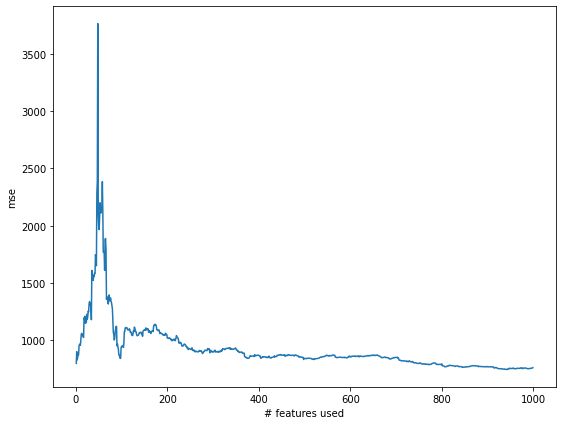

In [73]:
for i in range(1,x.shape[1]):
    A_fft = np.fft.fft(x[:,:i])
    print(A_fft)
    A_fft_test = np.fft.fft(x_test[:,:i])
    Inv = np.linalg.pinv(A_fft)
    beta = np.matmul(Inv,y)
    beta= beta.reshape(beta.size,1)
#     print("This is beta: " +str(beta))
    pred = np.matmul(A_fft_test,beta)
    diff = y_test-pred
    sum_sq = np.sum(diff**2)
    mse = sum_sq/(y_test.size)
    test_accuracy[i-1] = mse
    

print(A_fft)
    
# print(beta)
plt.figure(figsize = (9,7))
sns.lineplot(x = np.linspace(1,x.shape[1]-1,x.shape[1]-1), y = (test_accuracy))
plt.xlabel("# features used")
plt.ylabel("mse")
plt.show()